In [1]:
import os

import pandas as pd
import numpy as np


# Football matches dataset

This is a custom dataset generated from an public StatsBomb open dataset, using a custom algorithm to create extra synthetic data to give more insign on to the sports dynamic and structure.

## Data pre-processing


The data will be:
+ cleaned from irrelevant data
  + Collumns missing
  + removed irrelevant events by their type
+ resampled according to the target classes
  + the target classes are highly imbalanced
+ scaled feature values
  + many of the features had different scales 

> The following step removes about 200 features wich are not relevant to the target class

In [2]:
dataset = pd.read_csv("temp_dataset.csv", low_memory=False)

dataset = dataset[
    [
        "type_id",
        "type_name",
        "delta_direct_angle",
        "directness",
        "goal_scored",
        "indirect_distance",
        "opo_goal_angle",
        "opo_goal_distance",
        "opo_team_mat_delta_direct_angle",
        "opo_team_mat_directness",
        "opo_team_mat_indirect_distance",
        "opo_team_mat_opo_goal_angle",
        "opo_team_mat_opo_goal_distance",
        "opo_team_mat_own_goal_angle",
        "opo_team_mat_own_goal_distance",
        "opo_team_ses_delta_direct_angle",
        "opo_team_ses_directness",
        "opo_team_ses_indirect_distance",
        "opo_team_ses_opo_goal_angle",
        "opo_team_ses_opo_goal_distance",
        "opo_team_ses_own_goal_angle",
        "opo_team_ses_own_goal_distance",
        "own_goal_angle",
        "own_goal_distance",
        "own_team_mat_delta_direct_angle",
        "own_team_mat_directness",
        "own_team_mat_indirect_distance",
        "own_team_mat_opo_goal_angle",
        "own_team_mat_opo_goal_distance",
        "own_team_mat_own_goal_angle",
        "own_team_mat_own_goal_distance",
        "own_team_ses_delta_direct_angle",
        "own_team_ses_directness",
        "own_team_ses_indirect_distance",
        "own_team_ses_opo_goal_angle",
        "own_team_ses_opo_goal_distance",
        "own_team_ses_own_goal_angle",
        "own_team_ses_own_goal_distance",
    ]
]

dataset.head()

,type_id,type_name,delta_direct_angle,directness,goal_scored,indirect_distance,opo_goal_angle,opo_goal_distance,opo_team_mat_delta_direct_angle,opo_team_mat_directness,...,own_team_mat_opo_goal_distance,own_team_mat_own_goal_angle,own_team_mat_own_goal_distance,own_team_ses_delta_direct_angle,own_team_ses_directness,own_team_ses_indirect_distance,own_team_ses_opo_goal_angle,own_team_ses_opo_goal_distance,own_team_ses_own_goal_angle,own_team_ses_own_goal_distance
0,35,Starting XI,0.0,1.0,0,0.0,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,35,Starting XI,0.0,1.0,0,0.0,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,18,Half Start,0.0,1.0,0,0.0,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,18,Half Start,0.0,1.0,0,0.0,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,30,Pass,0.0,1.0,0,0.0,0.001333,60.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


> This is a temporary cleanup due to the dataset processing. This i supposed to be fixed after generating the database again.

In [3]:
# temporary change error in dataset

dataset = dataset.drop([
    "opo_team_mat_delta_direct_angle",
    "opo_team_mat_directness",
    "opo_team_mat_indirect_distance",
    "opo_team_mat_opo_goal_angle",
    "opo_team_mat_opo_goal_distance",
    "opo_team_mat_own_goal_angle",
    "opo_team_mat_own_goal_distance",
    "opo_team_ses_delta_direct_angle",
    "opo_team_ses_directness",
    "opo_team_ses_indirect_distance",
    "opo_team_ses_opo_goal_angle",
    "opo_team_ses_opo_goal_distance",
    "opo_team_ses_own_goal_angle",
    "opo_team_ses_own_goal_distance",
], axis=1)


> Events (rows) are removed based on their type. Some types are not relevant

In [4]:

for i in [22, 21, 19, 18, 34, 40, 27, 26, 25, 20, 41, 35, 36]:
    index_names = dataset[ 
        (dataset['type_id'] == i)
    ].index
    dataset.drop(index_names, inplace = True)

dataset['type_name'].value_counts()

Pass             108961
Ball Receipt*    100142
Carry             89811
Pressure          36619
Ball Recovery     11997
Duel               7008
Clearance          5035
Dribble            4576
Block              3897
Goal Keeper        3343
Miscontrol         3102
Dribbled Past      3006
Shot               2776
Dispossessed       2714
Interception       2119
Camera On           480
50/50               185
Camera off          115
Shield              114
Error                66
Bad Behaviour        62
Offside              42
Name: type_name, dtype: int64

In [5]:
dataset['goal_scored'].value_counts()

 0    380890
 1      4327
-1       953
Name: goal_scored, dtype: int64

> The data set is imbalanced by the nature of the sport itself, as it can be seen above. 

> The non-goal ending events are randomnly reduced to the number of goal ending events and the own-goal ending events are increased to the sumber of goal events.

In [6]:
from sklearn.utils import resample

df_majority = dataset[dataset['goal_scored'] == 0]
df_minority_plus = dataset[dataset['goal_scored'] == 1]
df_minority_minus = dataset[dataset['goal_scored'] == -1]

len(df_minority_plus)

df_majority = resample(df_majority, 
                        replace=False, 
                        n_samples=len(df_minority_plus),
                        random_state=123)

df_minority_minus = resample(df_minority_minus, 
                        replace=True, 
                        n_samples=len(df_minority_plus),
                        random_state=123)


dataset = pd.concat([df_majority, df_minority_plus, df_minority_minus])


dataset = dataset.sample(frac=1).reset_index(drop=True)


dataset['goal_scored'].value_counts()

 1    4327
-1    4327
 0    4327
Name: goal_scored, dtype: int64

> The data is scaled using the standard scaler. The data ranges are very different so this is necessary to keep everything in the same scale.

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


for c in dataset.columns.difference(['goal_scored', 'type_id', 'type_name']):
    dataset[[c]] = scaler.fit_transform(dataset[[c]])


## Data visualisation

Data will be shown in very different perspectives, generic and specific.


The type of events are also imbalanced but it follows the normal nature of sport.

In [8]:
dataset['type_name'].value_counts()

Pass             2464
Pressure         2337
Ball Receipt*    2327
Carry            2180
Goal Keeper      1680
Dribbled Past     386
Shot              381
Ball Recovery     301
Block             255
Duel              236
Dribble           136
Clearance         100
Error              51
Dispossessed       45
Interception       43
Miscontrol         39
Camera On          10
50/50               6
Camera off          2
Offside             1
Shield              1
Name: type_name, dtype: int64

This shows the relationship between all the features and the target class

In [9]:
dataset.corr()['goal_scored'].sort_values(ascending=False)

goal_scored                        1.000000
own_team_mat_own_goal_distance     0.837383
own_team_mat_opo_goal_distance     0.765841
own_team_mat_indirect_distance     0.749892
own_team_mat_delta_direct_angle    0.738024
own_team_mat_own_goal_angle        0.727677
own_goal_distance                  0.661877
own_team_ses_own_goal_distance     0.472308
type_id                            0.457603
own_team_ses_opo_goal_distance     0.378122
own_team_ses_indirect_distance     0.343550
own_team_ses_delta_direct_angle    0.305006
own_team_ses_own_goal_angle        0.293608
own_team_mat_opo_goal_angle        0.210071
delta_direct_angle                 0.157292
own_team_ses_opo_goal_angle        0.036380
opo_goal_angle                     0.024404
directness                         0.008500
indirect_distance                 -0.001883
own_goal_angle                    -0.199426
own_team_ses_directness           -0.397528
opo_goal_distance                 -0.658994
own_team_mat_directness         

This is the basic type information about the various features used

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12981 entries, 0 to 12980
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   type_id                          12981 non-null  int64  
 1   type_name                        12981 non-null  object 
 2   delta_direct_angle               12981 non-null  float64
 3   directness                       12981 non-null  float64
 4   goal_scored                      12981 non-null  int64  
 5   indirect_distance                12981 non-null  float64
 6   opo_goal_angle                   12981 non-null  float64
 7   opo_goal_distance                12981 non-null  float64
 8   own_goal_angle                   12981 non-null  float64
 9   own_goal_distance                12981 non-null  float64
 10  own_team_mat_delta_direct_angle  12981 non-null  float64
 11  own_team_mat_directness          12981 non-null  float64
 12  own_team_mat_indir

> This describes the overall arrangement of data

In [11]:
dataset.describe()

,type_id,delta_direct_angle,directness,goal_scored,indirect_distance,opo_goal_angle,opo_goal_distance,own_goal_angle,own_goal_distance,own_team_mat_delta_direct_angle,...,own_team_mat_opo_goal_distance,own_team_mat_own_goal_angle,own_team_mat_own_goal_distance,own_team_ses_delta_direct_angle,own_team_ses_directness,own_team_ses_indirect_distance,own_team_ses_opo_goal_angle,own_team_ses_opo_goal_distance,own_team_ses_own_goal_angle,own_team_ses_own_goal_distance
count,12981.000000,12981.000000,12981.000000,12981.000000,12981.000000,12981.000000,12981.000000,12981.000000,12981.000000,12981.000000,...,12981.000000,12981.000000,12981.000000,12981.000000,12981.000000,12981.000000,12981.000000,12981.000000,12981.000000,12981.000000
mean,28.893691,0.207902,0.591553,0.000000,0.094372,0.000565,0.580314,0.007059,0.444024,0.106200,...,0.271131,0.058821,0.428880,0.051174,0.835765,0.038612,0.000523,0.141015,0.022140,0.216677
std,12.269274,0.228542,0.333369,0.816528,0.103222,0.008803,0.268775,0.032565,0.276915,0.091388,...,0.220413,0.050661,0.340838,0.107234,0.286276,0.079972,0.008818,0.228902,0.048055,0.320912
min,2.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.035572,0.290552,-1.000000,0.020331,0.000240,0.370125,0.001165,0.208915,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.731205,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,0.125952,0.591775,0.000000,0.062168,0.000325,0.578300,0.001599,0.449706,0.144707,...,0.363838,0.075572,0.622538,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.000000,0.305988,0.969689,1.000000,0.135760,0.000452,0.833388,0.003140,0.672671,0.170592,...,0.451492,0.096231,0.708899,0.057004,1.000000,0.042626,0.000730,0.270878,0.040837,0.518279
max,43.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> There are some outliers and irregularities which are directly related to the dataset generating algorithm. Most of this errors can be fixed by doing some modifications to the algorithm but it is beyond the scope of this exercise.

<Figure size 432x288 with 0 Axes>

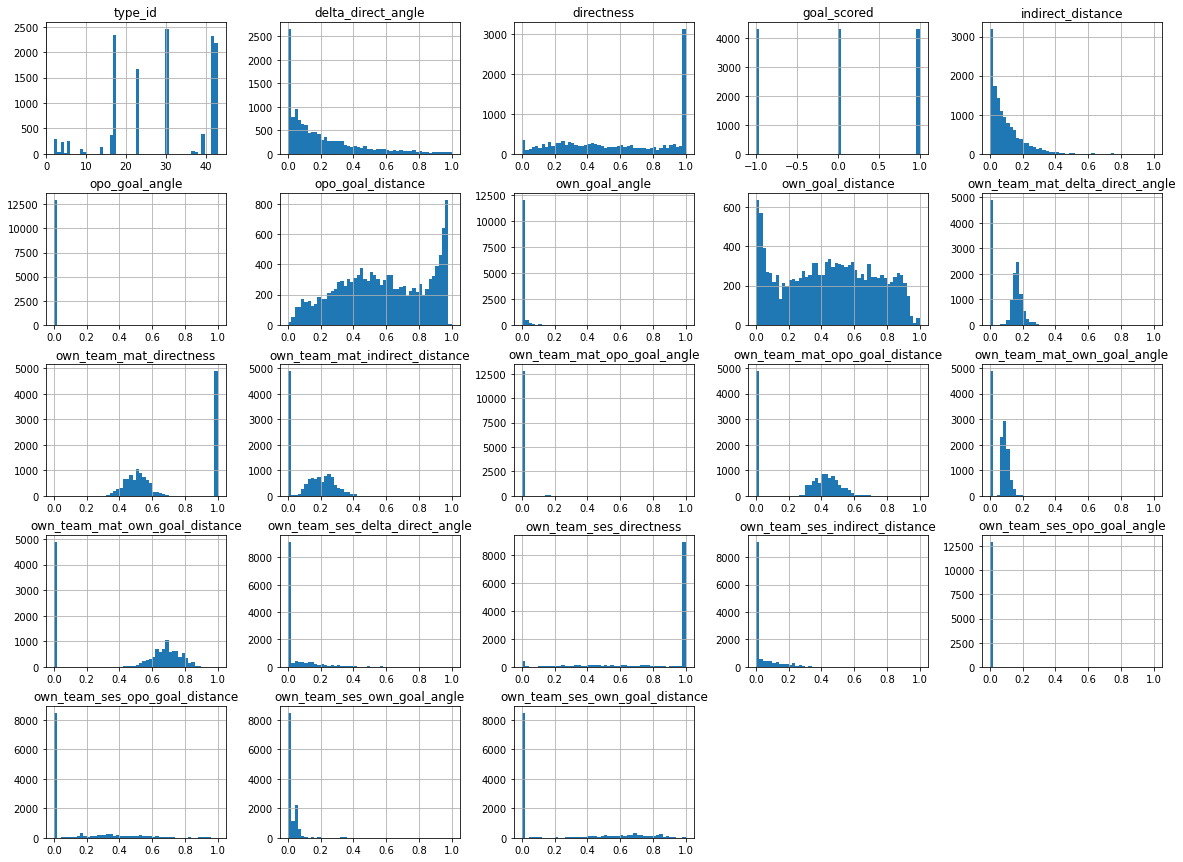

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt


fig = plt.figure()
dataset.hist(bins=50, figsize=(20, 15))

plt.show()

<AxesSubplot:xlabel='goal_scored', ylabel='own_team_mat_delta_direct_angle'>

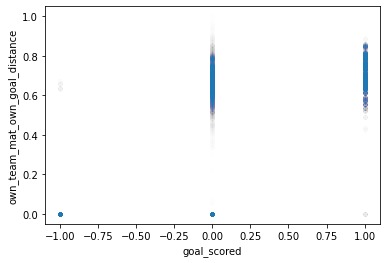

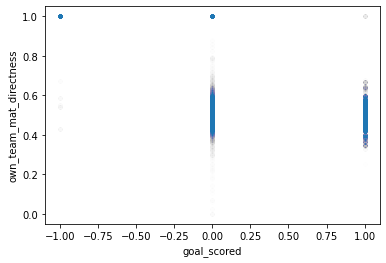

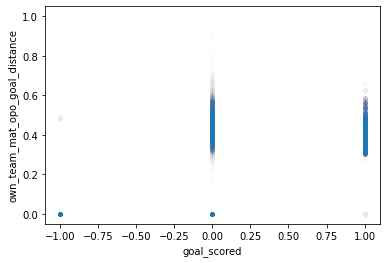

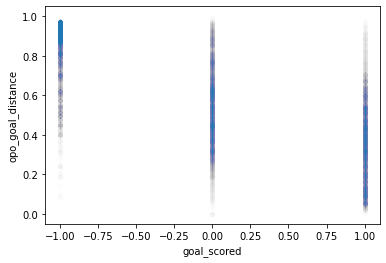

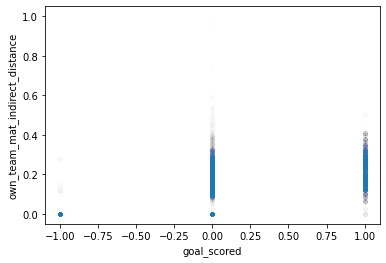

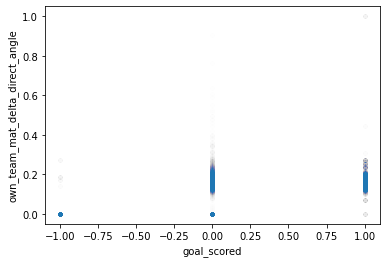

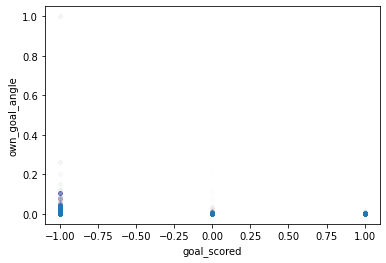

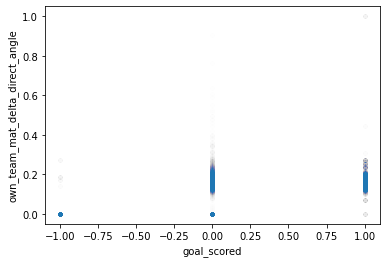

In [13]:
alpha = 0.005

dataset.plot(kind="scatter", x="goal_scored", y="own_team_mat_own_goal_distance", alpha=alpha)

dataset.plot(kind="scatter", x="goal_scored", y="own_team_mat_directness", alpha=alpha)

dataset.plot(kind="scatter", x="goal_scored", y="own_team_mat_opo_goal_distance", alpha=alpha)

dataset.plot(kind="scatter", x="goal_scored", y="opo_goal_distance", alpha=alpha)

dataset.plot(kind="scatter", x="goal_scored", y="own_team_mat_indirect_distance", alpha=alpha)

dataset.plot(kind="scatter", x="goal_scored", y="own_team_mat_delta_direct_angle", alpha=alpha)

dataset.plot(kind="scatter", x="goal_scored", y="own_goal_angle", alpha=alpha)

dataset.plot(kind="scatter", x="goal_scored", y="own_team_mat_delta_direct_angle", alpha=alpha)


printing figure scatter_matrix_plot


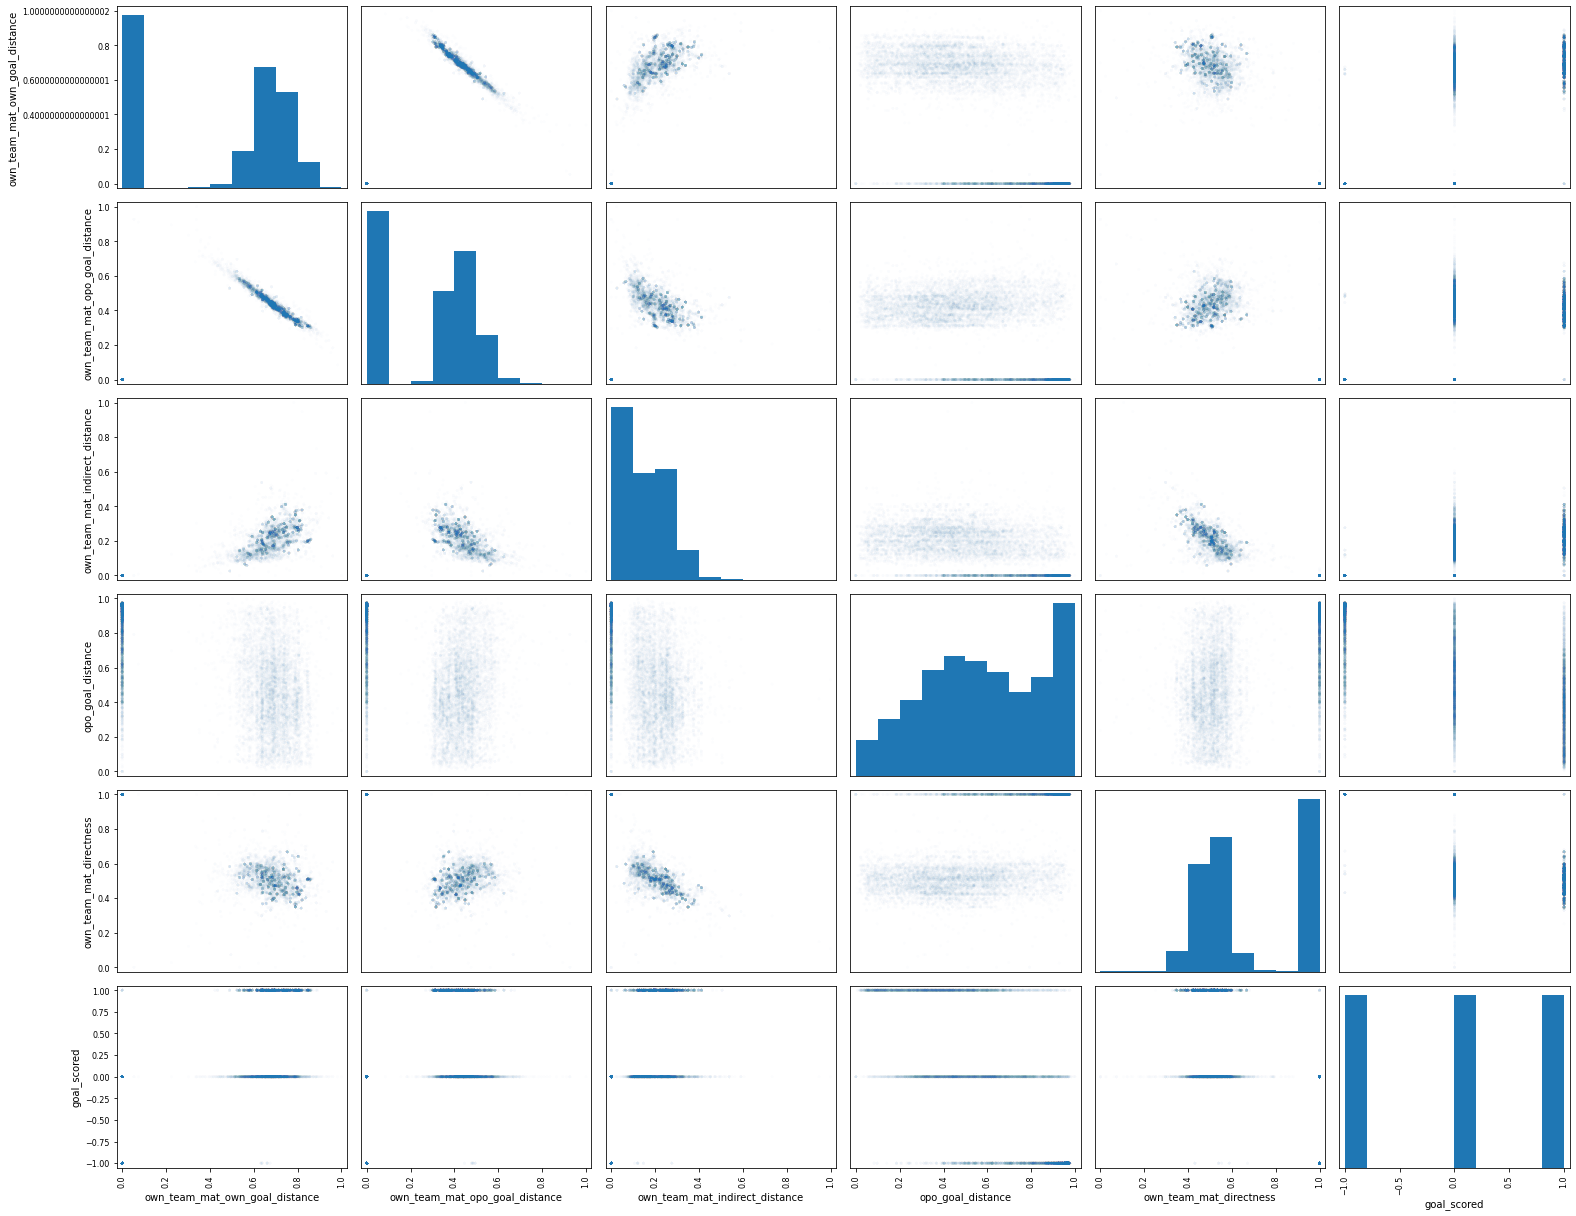

In [14]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join("imgs", fig_id + "." + fig_extension)
    print("printing figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    #plt.savefig(path, format=fig_extension, dpi=resolution)


attributes = [    
    "own_team_mat_own_goal_distance",
    "own_team_mat_opo_goal_distance",
    "own_team_mat_indirect_distance",
    "opo_goal_distance",
    "own_team_mat_directness",
    #"type_id",
    "goal_scored"
]

scatter_matrix(dataset[attributes], figsize=(22, 17), alpha=0.01)

save_fig("scatter_matrix_plot")

# Data modelling

> The data is now split between training and test data.

In [15]:
from sklearn.model_selection import train_test_split


y = dataset['goal_scored']

X = dataset[dataset.columns.difference(['goal_scored', 'type_name'])]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

> Initialised the Guassian Naive Bayes classifier

In [16]:

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()


> The model has a multi label class so the confusion matrix is 3x3, instead of the clasic 2x2

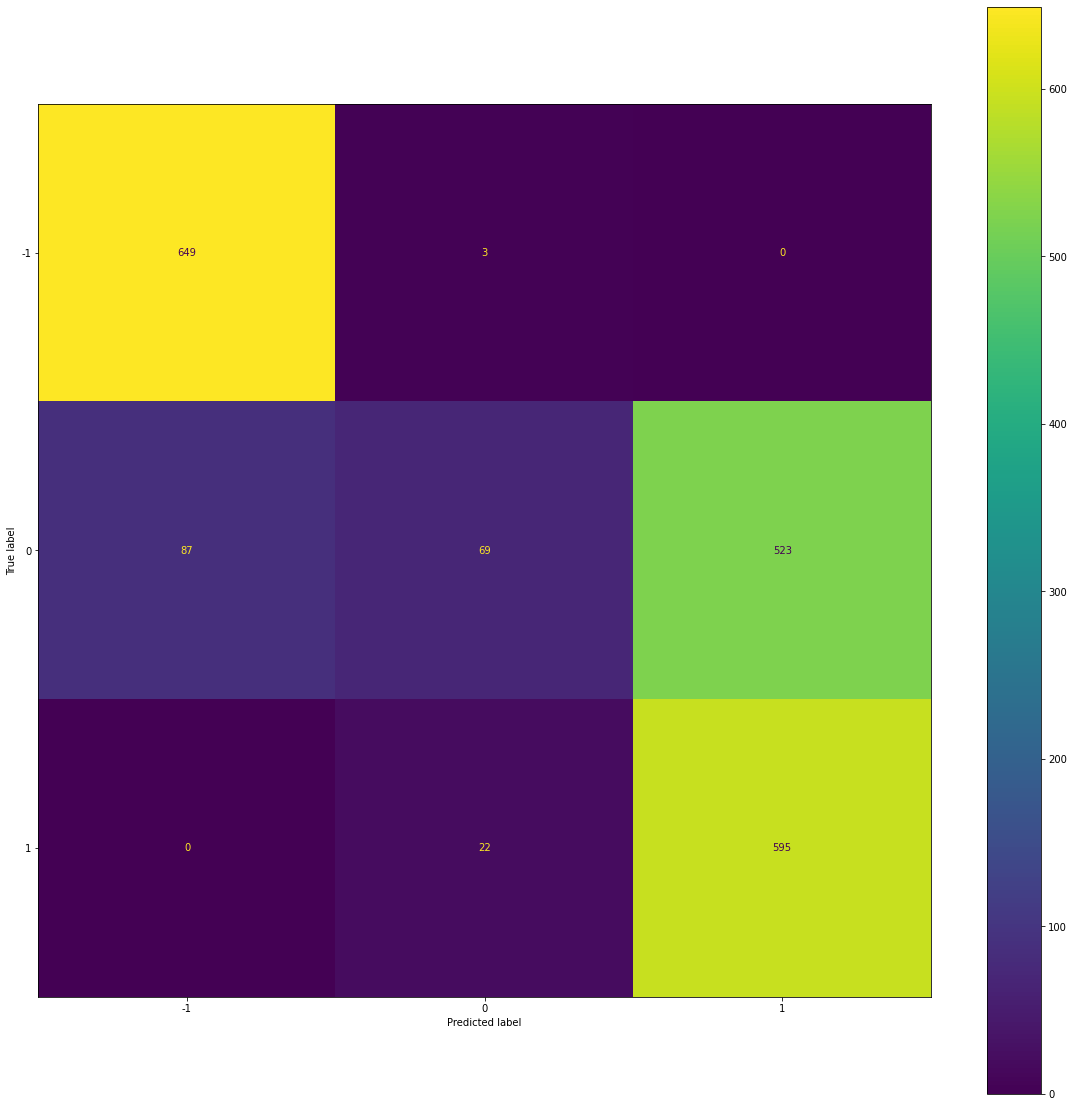

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

clf.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(20, 20))

plot_confusion_matrix(clf, X_test, y_test, ax=ax)  


plt.show()

> Another version of the confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
cm

array([[649,   3,   0],
       [ 87,  69, 523],
       [  0,  22, 595]])

> Here are the many different model metrics, to evaluate the model's effectiveness

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))
# https://towardsdatascience.com/multi-class-classification-extracting-performance-metrics-from-the-confusion-matrix-b379b427a872

TP = np.diag(cm)
FP = cm.sum(axis=0) - TP
FN = cm.sum(axis=1) - TP
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity
SENS = np.average(TP/(TP+FN))
print("Sensitivity: " + str(SENS))

# Specificity
SPEC = np.average(TN/(TN+FP))
print("Specificity: " + str(SPEC))

# Average Success rate
ASR = np.average((TP+TN)/(TP+FP+FN+TN))
print("Average Success rate: " + str(ASR))

# Average Error rate
AER = 1 - ASR
print("Average Error rate: " + str(AER))

Precision: 0.72
Recall: 0.69
F1-score: 0.60

Sensitivity: 0.6871208001721071
Specificity: 0.8400773926278
Average Success rate: 0.7826830937713894
Average Error rate: 0.21731690622861055


> Here is the classificatio report, also showing some metrics but focused on each label

In [20]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.88      1.00      0.94       652
           0       0.73      0.10      0.18       679
           1       0.53      0.96      0.69       617

    accuracy                           0.67      1948
   macro avg       0.72      0.69      0.60      1948
weighted avg       0.72      0.67      0.59      1948



> The ROC score. The ROC area could not be calculated because it is not possible to do it for a multilabel class

In [21]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, clf.predict_proba(X_train), multi_class='ovr')

0.8599636259900244

## Clustering


This section will focus on trying and evaluating many different including soft, hard and hierarchical clustering algorithms. 

I tried, following that to get metrics for different numbers of clusters for the k-means algorithm.

At the end, I plotted the intertia to visualise how it varies according to the number os k_means

In [22]:
from sklearn.metrics.cluster import rand_score, adjusted_rand_score, adjusted_mutual_info_score, v_measure_score


def evaluate_clustering_algorithm(y_pred, X_test, y_test):

    return rand_score(y_test, y_pred), adjusted_rand_score(y_test, y_pred), adjusted_mutual_info_score(y_test, y_pred), v_measure_score(y_test, y_pred)
    
def print_clustering_evaluation(y_pred, X_test, y_test):
    
    rand_score, adjusted_rand_score, adjusted_mutual_info_score, v_measure_score = evaluate_clustering_algorithm(y_pred, X_test, y_test)
    print("rand_score: " + str(rand_score))
    
    
    print("adjusted_rand_score: " + str(adjusted_rand_score))
    
    
    print("adjusted_mutual_info_score: " + str(adjusted_mutual_info_score))
    
    
    print("v_measure_score: " + str(v_measure_score))
    

In [23]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, algorithm="full", max_iter=6, random_state=123).fit(X_train)

y_pred = kmeans.predict(X_test)

print_clustering_evaluation(y_pred, X_test, y_test)

rand_score: 0.5968794196093816
adjusted_rand_score: 0.09513421844728397
adjusted_mutual_info_score: 0.0958965456700447
v_measure_score: 0.09674490042962033


I got a decent result with the K-means cluster. This algorithm is very versatile and performs well on large datasets such as this one. However it does not get the optimal result because the data has high dimensionality (about 20 features) so its euclidean distance get "inflated"

In [24]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2, random_state=123).fit(X_train)

y_pred = gm.predict(X_test)

print_clustering_evaluation(y_pred, X_test, y_test)

rand_score: 0.7475160542887547
adjusted_rand_score: 0.5047984946263216
adjusted_mutual_info_score: 0.5900819932365626
v_measure_score: 0.5903212721951558


The Guassian mixture performs very well because it is a soft clustering algorithm. The dataset has many values but their clusters are not defined by regions. This is because it groups values by their own Guassian distribution.

In [25]:
from sklearn.mixture import BayesianGaussianMixture


bgm = BayesianGaussianMixture(n_components=2, random_state=123).fit(X_train)

y_pred = bgm.predict(X_test)


print_clustering_evaluation(y_pred, X_test, y_test)

rand_score: 0.7475160542887547
adjusted_rand_score: 0.5047984946263216
adjusted_mutual_info_score: 0.5900819932365626
v_measure_score: 0.5903212721951558


The Bayesian Guassian mixture performed very well as well because it combines the advantages of Guassian mixture plus the Bayes algorithm.

In [26]:
from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps=3, min_samples=2).fit(X_train)

y_pred = dbscan.fit_predict(X_test)

print_clustering_evaluation(y_pred, X_test, y_test)

rand_score: 0.6834106913284166
adjusted_rand_score: 0.22554067114841525
adjusted_mutual_info_score: 0.3200774188665931
v_measure_score: 0.3213764335700252


This algorithm performed better than K-means but it did not reach the Guassian mixtures methods quality. It performed better than K-means because it assumes that clusters can be of any shape which can be usefull since the same type event of event in this dataset might have slightly different types of results.

In [27]:
kmeans_per_k = [KMeans(n_clusters=k, init="random", n_init=1, algorithm="full", max_iter=4, random_state=123).fit(X_train) \
                for k in range(1, 10)]


for km in kmeans_per_k:
    print("\n\n\nKmeans model with " + str(km.n_clusters) + " clusters\n")
    print_clustering_evaluation(km.predict(X_test), X_test, y_test)




Kmeans model with 1 clusters

rand_score: 0.333500494099805
adjusted_rand_score: 0.0
adjusted_mutual_info_score: 9.822019596996815e-16
v_measure_score: 1.0112734764782213e-15



Kmeans model with 2 clusters

rand_score: 0.5386821614678087
adjusted_rand_score: 0.09734128008705263
adjusted_mutual_info_score: 0.10244219657879967
v_measure_score: 0.10296723024654243



Kmeans model with 3 clusters

rand_score: 0.5491426287375196
adjusted_rand_score: 0.07749620493807254
adjusted_mutual_info_score: 0.10856120266080545
v_measure_score: 0.10947390798445752



Kmeans model with 4 clusters

rand_score: 0.6073398868790927
adjusted_rand_score: 0.07209803035989056
adjusted_mutual_info_score: 0.1016037094044437
v_measure_score: 0.10273815799928533



Kmeans model with 5 clusters

rand_score: 0.6728168118381462
adjusted_rand_score: 0.22758828385584695
adjusted_mutual_info_score: 0.22786574552421549
v_measure_score: 0.22911269654392824



Kmeans model with 6 clusters

rand_score: 0.6847079010619191

The K-means clustering has a very stable value with different number of clusters. This hints that it is performing to the best of its capabilities and increasing the number of clusters will not increase its performance. The best overall value for all scores is for 7 clusters.

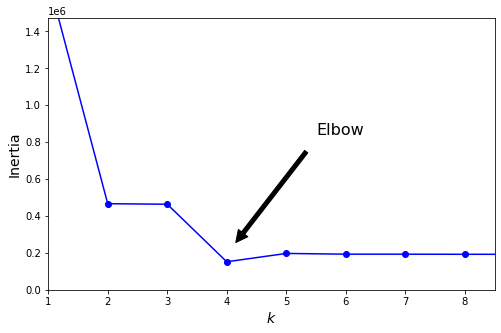

In [28]:
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[5]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1472677])
plt.show()

The k-means algorithm converges its internal coherence from 4 clusters. This means that it should be the ran with 4 clusters at the least.

In [29]:
k_means = kmeans_per_k[5 - 1]

In [30]:
k_means.cluster_centers_

array([[ 2.50609731e-01,  5.54189471e-01,  1.05224863e-01,
         5.87093912e-04,  4.89226582e-01,  1.88807941e-03,
         5.39665378e-01,  1.43091425e-01,  5.82878554e-01,
         1.82829598e-01,  1.20085607e-02,  3.63126570e-01,
         7.85316556e-02,  5.76461536e-01,  6.75298021e-02,
         7.84713214e-01,  5.25011189e-02,  5.67648650e-04,
         1.78993366e-01,  2.84517294e-02,  2.80730091e-01,
         4.14438391e+01],
       [ 2.68159019e-01,  5.64137716e-01,  9.88385378e-02,
         4.99974779e-04,  4.68662877e-01,  1.64206772e-03,
         5.65381297e-01,  1.68828374e-01,  5.04502969e-01,
         2.14527225e-01,  1.50469603e-02,  4.29208506e-01,
         9.32133041e-02,  6.87448047e-01,  8.71131710e-02,
         7.26539243e-01,  6.18916499e-02,  7.11175336e-04,
         2.36824085e-01,  3.81237268e-02,  3.51851710e-01,
         4.30000000e+01],
       [ 2.29988278e-01,  6.52841612e-01,  7.84904455e-02,
         3.98734276e-04,  4.98984209e-01,  1.73690946e-03,
    

# Decision Trees


This section will cover the topic of tree based classifiers and model fitting

In [31]:
import matplotlib as mpl

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)


def print_evaluation(y_true, y_pred):
    print("accuracy_score " + str(accuracy_score(y_true, y_pred)))
    print(classification_report(y_test, y_pred))

In [32]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict



tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)

kf = KFold(n_splits=10, shuffle=True, random_state=123)

cv_scores = cross_val_score(tree_clf, X_train, y_train, cv=kf)

cv_scores.mean()

0.6994505268897736

The cross validation score is around 71%. This is a resonably good result because it is important to have a high score but still generalise to new unknown data. This is also due to the rebalancing and shuffling of the dataset.

If the score was 100% that would be, in any real and complex scenario, an evidence that the predicting model can not generalise to new data.

In [33]:

for i in range(4, 11):
    print("\n\nmax leaf number: " + str(i))
    
    tree_clf = DecisionTreeClassifier(max_depth=i, random_state=42)
    tree_clf.fit(X_train, y_train)
    print_evaluation(y_test, tree_clf.predict(X_test))
    

#_ = plot_tree(tree_clf)



max leaf number: 4
accuracy_score 0.747946611909651
              precision    recall  f1-score   support

          -1       0.91      0.97      0.94       652
           0       0.68      0.53      0.60       679
           1       0.65      0.75      0.69       617

    accuracy                           0.75      1948
   macro avg       0.74      0.75      0.74      1948
weighted avg       0.74      0.75      0.74      1948



max leaf number: 5
accuracy_score 0.7484599589322382
              precision    recall  f1-score   support

          -1       0.90      0.98      0.94       652
           0       0.70      0.49      0.58       679
           1       0.64      0.78      0.70       617

    accuracy                           0.75      1948
   macro avg       0.75      0.75      0.74      1948
weighted avg       0.75      0.75      0.74      1948



max leaf number: 6
accuracy_score 0.7643737166324436
              precision    recall  f1-score   support

          -1       

Here is possible to assume that, due to the multidimensionality and complexity of the data, the score increases as the max leaf depth increases.

This shows that the more complex the dataset set is the longer its leaves need to be as it needs to cover more feature relationships, and therefore, more overall possiblities.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


tree_clf = DecisionTreeClassifier(max_depth=9, random_state=42)
tree_clf.fit(X_train, y_train)
print_evaluation(y_test, tree_clf.predict(X_test))

accuracy_score 0.8295250320924262
              precision    recall  f1-score   support

          -1       0.90      0.99      0.95      1279
           0       0.82      0.65      0.73      1349
           1       0.76      0.85      0.81      1267

    accuracy                           0.83      3895
   macro avg       0.83      0.83      0.83      3895
weighted avg       0.83      0.83      0.82      3895



Here the dataset is trained with 60% of the overall data

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)



tree_clf = DecisionTreeClassifier(max_depth=9, random_state=42)
tree_clf.fit(X_train, y_train)
print_evaluation(y_test, tree_clf.predict(X_test))

accuracy_score 0.7997175503915779
              precision    recall  f1-score   support

          -1       0.90      0.99      0.94      2584
           0       0.72      0.66      0.69      2633
           1       0.76      0.75      0.76      2572

    accuracy                           0.80      7789
   macro avg       0.79      0.80      0.80      7789
weighted avg       0.79      0.80      0.80      7789



Here the dataset is trained with 30%

There is a significant difference between the two training sizes. The model performs better if trained with a larger training dataset. 

This is due again to the complexity of the dataset that the training needs to be in a larger dataset to learn because there are many possibilities.

In [36]:
from sklearn.ensemble import RandomForestClassifier

rand_forest_clf = RandomForestClassifier(max_depth=2, random_state=0)

kf = KFold(n_splits=10, shuffle=True, random_state=123)

cv_scores = cross_val_score(tree_clf, X_train, y_train, cv=kf)

cv_scores.mean()

0.79141359122573

The random forest performs significantly better than decision tree. 


It might indicate that a complex problem requires a model that can represent that complexity.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


for i in range(4, 11):
    print("\n\nmax leaf number: " + str(i))
    
    rand_forest_clf = RandomForestClassifier(max_depth=i, random_state=0)
    rand_forest_clf.fit(X_train, y_train)
    print_evaluation(y_test, rand_forest_clf.predict(X_test))



max leaf number: 4
accuracy_score 0.7643737166324436
              precision    recall  f1-score   support

          -1       0.89      1.00      0.94       652
           0       0.70      0.56      0.62       679
           1       0.68      0.75      0.71       617

    accuracy                           0.76      1948
   macro avg       0.76      0.77      0.76      1948
weighted avg       0.76      0.76      0.76      1948



max leaf number: 5
accuracy_score 0.7792607802874744
              precision    recall  f1-score   support

          -1       0.89      1.00      0.94       652
           0       0.73      0.58      0.65       679
           1       0.70      0.77      0.73       617

    accuracy                           0.78      1948
   macro avg       0.77      0.78      0.77      1948
weighted avg       0.77      0.78      0.77      1948



max leaf number: 6
accuracy_score 0.797741273100616
              precision    recall  f1-score   support

          -1       

Here, as in the decision tree, the score increases as the max leaf depth increases. 

 

It means that it is accommodating the dataset’s complexity better than Decision trees 

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rand_forest_clf = RandomForestClassifier(max_depth=9, random_state=0)
rand_forest_clf.fit(X_train, y_train)
print_evaluation(y_test, rand_forest_clf.predict(X_test))

accuracy_score 0.8616174582798459
              precision    recall  f1-score   support

          -1       0.90      1.00      0.95      1279
           0       0.89      0.69      0.78      1349
           1       0.80      0.91      0.85      1267

    accuracy                           0.86      3895
   macro avg       0.86      0.86      0.86      3895
weighted avg       0.86      0.86      0.86      3895



The random forest has a better performance than the same case in the Decision Tree. 

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)



rand_forest_clf = RandomForestClassifier(max_depth=9, random_state=0)
rand_forest_clf.fit(X_train, y_train)
print_evaluation(y_test, rand_forest_clf.predict(X_test))

accuracy_score 0.851457183207087
              precision    recall  f1-score   support

          -1       0.90      0.99      0.95      2584
           0       0.86      0.67      0.75      2633
           1       0.80      0.89      0.84      2572

    accuracy                           0.85      7789
   macro avg       0.85      0.85      0.85      7789
weighted avg       0.85      0.85      0.85      7789



The random forest has a better performance than the same case in the Decision Tree. 

Here, as in Decision tree, the scores increase as the training set increases in size. 

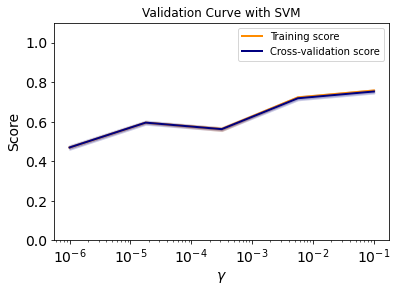

In [40]:

from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(),
    X_train,
    y_train,
    param_name="gamma",
    param_range=param_range,
    scoring="accuracy",
    n_jobs=1,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

We can see that both scores increase in value as the data being trained and tested increase. 


It is safe to say that the training score is never outside the cross validation standard deviation error. This means that the data is not overfitting, and therefore the model is generalising appropriately relatively to unknown/testing data. 

# Neural Networks

# Linear classifier

In [41]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(max_iter=1000, tol=1e-3)

clf.fit(X_train, y_train)


accuracy_score(y_train, clf.predict(X_train))

0.685477657935285

First run of the linear classifier using the default parameters. The result has low accuracy. It may hint that the data is non-linearly separable

In [42]:
accuracy_score(y_test, clf.predict(X_test))

0.6705610476312749

The classifier did not generalise that well in for new data because the result has low accuracy, just slightly better than the training fit accuracy result.

In [43]:
from sklearn.model_selection import KFold, cross_validate

kf = KFold(n_splits=10, random_state=42, shuffle=True)



clf = SGDClassifier(max_iter=1000, tol=1e-3)

clf.fit(X_train, y_train)

cv_scores = cross_val_score(clf, X_train, y_train, cv=kf)

np.mean(cv_scores)

0.6920160812212834

In [44]:
cv_scores

array([0.73269231, 0.70384615, 0.61271676, 0.72254335, 0.68593449,
       0.68400771, 0.72061657, 0.70712909, 0.6955684 , 0.65510597])

The 10-fold cross validation had the roughly the same result as the normal fitting method. So there is no improvement in using this cross validation technique. The data fiting is not affected by that.

In [45]:
accuracy_score(y_test, clf.predict(X_test))

0.5666966234433175

The testing data has aproximately the same value as the cross validation.


The different results in the linear classifier confirm that the dataset is a non-linear separable. This proves that the target class is scattered around the calculated linear model and the best it can do is identify most of the correct occurences.

## Multilayer perceptron

In [46]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

clf = MLPClassifier(random_state=42, max_iter=300).fit(X_train, y_train)
clf.score(X_test, y_test)

0.7445442875481386

The first run of the MLP classifier has a low accuracy result. just slightly better than the linear model. This might mean that it captures better the scattered target results than the linear classifier.

In [47]:
clf = MLPClassifier(random_state=42, max_iter=300, solver='sgd').fit(X_train, y_train)
clf.score(X_test, y_test)

0.7340179717586649

The pure Stochastic gradient descent has a slightly worse accuracy than the default Stochastic gradient-based solver (adam).

In [48]:

clf = MLPClassifier(random_state=42, max_iter=10000, solver='lbfgs').fit(X_train, y_train)
clf.score(X_test, y_test)

0.7540436456996149

The quasi-Newton solver optimiser method has a slightly better default (adam) solver. 

The only drawback is the increased maximum iteration threshold which takes longer time to run. The threshold is too large to work with.

In [49]:

clf = MLPClassifier(random_state=42, max_iter=300, hidden_layer_sizes=(200,)).fit(X_train, y_train)
clf.score(X_test, y_test)

0.7489088575096278

This run double the default hidden layer's amount what gave a slight better result. This might mean that more layers can adapt better to this dataset.

In [50]:

clf = MLPClassifier(random_state=42, max_iter=300, hidden_layer_sizes=(500,)).fit(X_train, y_train)
clf.score(X_test, y_test)

0.7522464698331194

The number of hidden layers was increased, because the previous result was significantly better, but it did not improve much beyond the previous attempt

In [51]:

clf = MLPClassifier(random_state=42, max_iter=300, learning_rate='invscaling').fit(X_train, y_train)
clf.score(X_test, y_test)

0.7445442875481386

The invsalling learning rate does not have any significant impact.

In [52]:

clf = MLPClassifier(random_state=42, max_iter=300, learning_rate='adaptive').fit(X_train, y_train)
clf.score(X_test, y_test)

0.7445442875481386

The adaptive learning rate does not have any significant impact.

In [54]:

clf = MLPClassifier(random_state=42, max_iter=300, learning_rate_init=0.005).fit(X_train, y_train)
clf.score(X_test, y_test)

0.744801026957638

Increasing the initial learning rate did not have a better result than the original

In [55]:

clf = MLPClassifier(random_state=42, max_iter=300, learning_rate_init=0.0005).fit(X_train, y_train)
clf.score(X_test, y_test)

0.7530166880616175

Decreasing the initial learning rate relatively to the default value has a better result.

In [56]:

clf = MLPClassifier(random_state=42, max_iter=1000).fit(X_train, y_train)
clf.score(X_test, y_test)

0.7445442875481386

Finally increasing the number of max iterations does not have any impact in the final result

## Convolution Neural networks

In [65]:

import tensorflow as tf

os.environ['CUDA_VISIBLE_DEVICES'] = "0"

This is the initial setup

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.3, random_state=42)

I had to execute train_test_split again because tensorflow is expecting numpy array instead of a normal pandas dataframe

In [68]:
X_train.shape

(9086, 22)

Checking the numpy shape before reshaping it

In [69]:
X_test.shape

(3895, 22)

Checking the numpy shape before reshaping it

In [70]:
X_train = X_train.reshape(9086,22,1)

Reshaping the training data to be the input of the tensorflow model

In [71]:
X_test = X_test.reshape(3895,22,1)

Reshaping the training data to be the input of the tensorflow model

In [73]:

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(64, (3), activation='relu', input_shape=(22,1)),
  tf.keras.layers.MaxPooling1D(2, 2),
  tf.keras.layers.Conv1D(64, (3), activation='relu'),
  tf.keras.layers.MaxPooling1D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 20, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 8, 64)             12352     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4, 64)            0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

2021-11-26 11:24:03.740071: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-11-26 11:24:03.740113: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pc): /proc/driver/nvidia/version does not exist


The mode compiled uses 1 dimensional layers because the dataset instances are 1 dimensional as well because thay are not images.

In [75]:
y_train = y_train + 1
y_test = y_test + 1

In [76]:

model.fit(X_train, y_train, epochs=100, verbose=True)

Epoch 1/100
284/284 [==============================] - 1s 2ms/step - loss: 0.5876 - accuracy: 0.6965
Epoch 2/100
284/284 [==============================] - 1s 2ms/step - loss: 0.5115 - accuracy: 0.7387
Epoch 3/100
284/284 [==============================] - 1s 2ms/step - loss: 0.5000 - accuracy: 0.7451
Epoch 4/100
284/284 [==============================] - 1s 2ms/step - loss: 0.4946 - accuracy: 0.7454
Epoch 5/100
284/284 [==============================] - 1s 2ms/step - loss: 0.4923 - accuracy: 0.7483
Epoch 6/100
284/284 [==============================] - 1s 2ms/step - loss: 0.4876 - accuracy: 0.7543
Epoch 7/100
284/284 [==============================] - 1s 2ms/step - loss: 0.4842 - accuracy: 0.7572
Epoch 8/100
284/284 [==============================] - 1s 2ms/step - loss: 0.4805 - accuracy: 0.7581
Epoch 9/100
284/284 [==============================] - 1s 2ms/step - loss: 0.4767 - accuracy: 0.7617
Epoch 10/100
284/284 [==============================] - 1s 2ms/step - loss: 0.4760 - accura

In [78]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print("\nTest accuracy", test_acc)

122/122 [==============================] - 0s 1ms/step - loss: 0.3704 - accuracy: 0.8665

Test accuracy 0.8664954900741577
